Referred from: https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv("./insurance.csv")

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.shape

(1338, 7)

C:\Users\cs25\AppData\Local\anaconda3\envs\HunderedDaysofML\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Charge vs BMI')

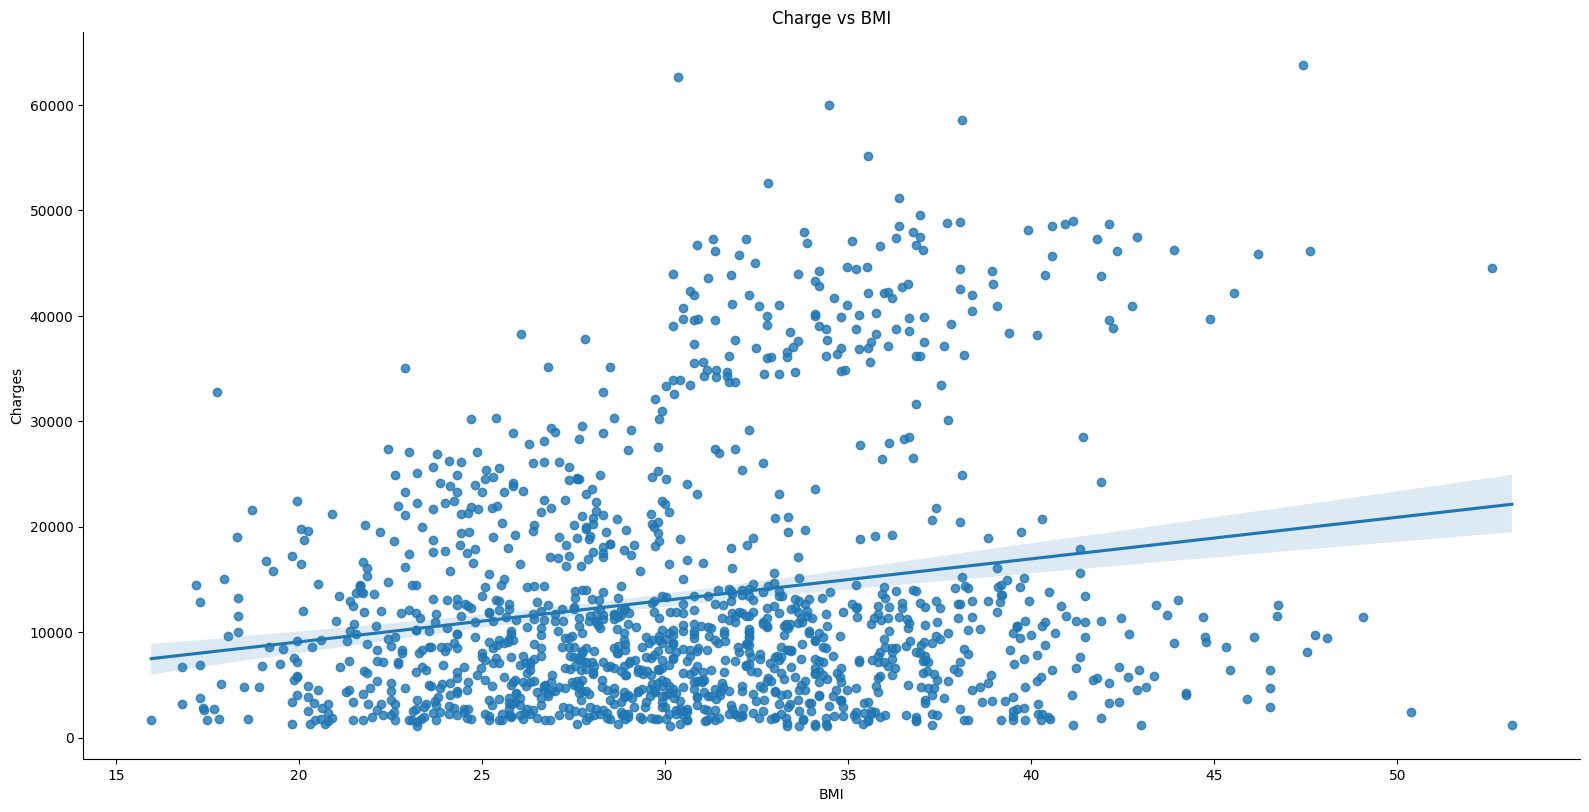

In [19]:
sns.lmplot(x= "bmi", y= "charges", data= df, aspect=2, height=8)    #Scatter plot with overlaid regression lines
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Charge vs BMI")

In [23]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Missing Values')

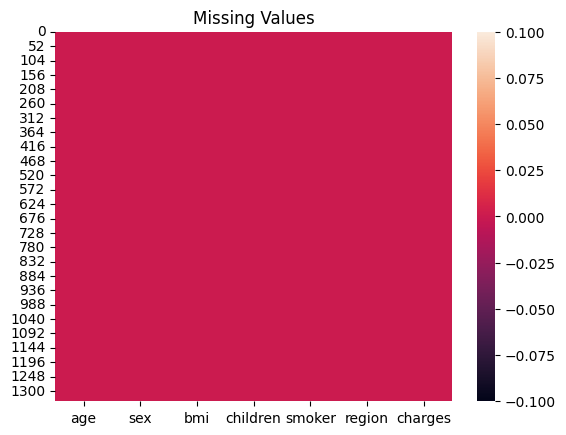

In [25]:
sns.heatmap(df.isnull())
plt.title("Missing Values")

Text(0.5, 1.0, 'Correlation')

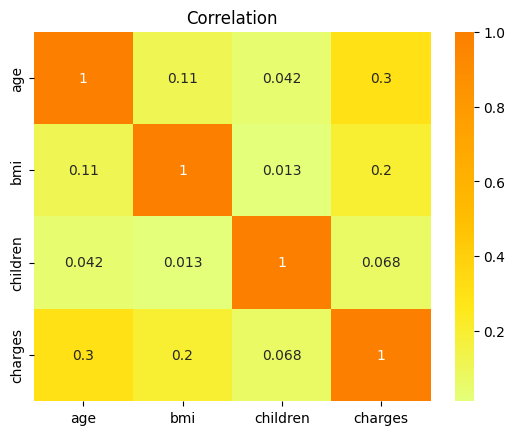

In [36]:
corr = df[["age", "bmi", "children", "charges"]].corr()
sns.heatmap(corr, cmap = "Wistia", annot=True)
plt.title("Correlation")

C:\Users\cs25\AppData\Local\Temp\ipykernel_12108\3095769104.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"], color="r", bins=50, ax=ax)
C:\Users\cs25\AppData\Local\Temp\ipykernel_12108\3095769104.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df["charges"]), bins=

Text(0.5, 1.0, 'Distribution of charges in $log$ scale')

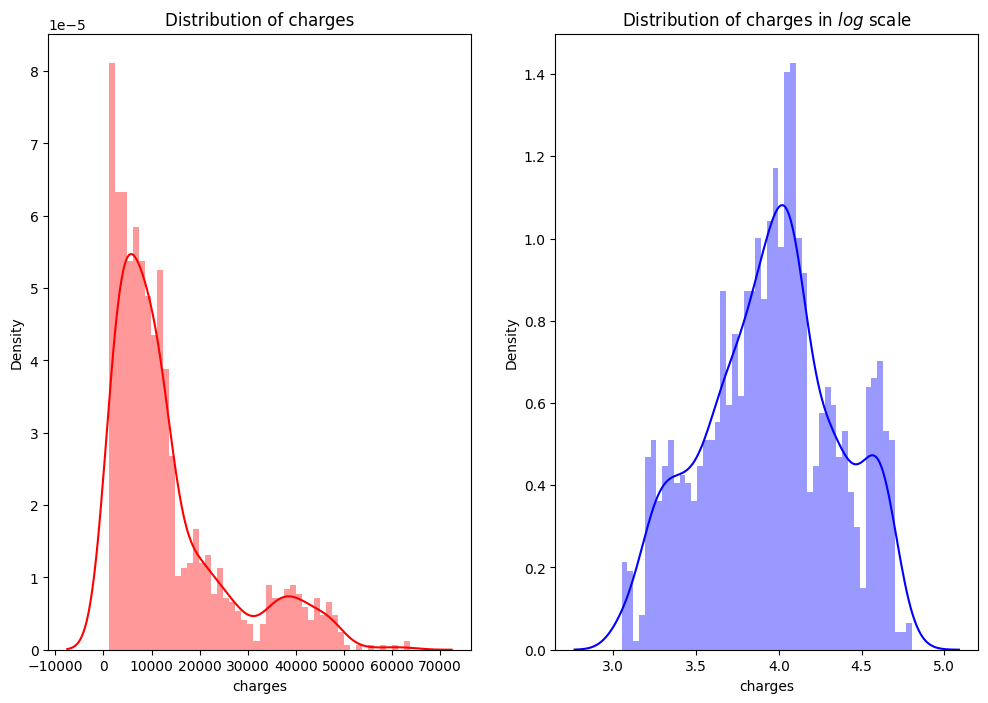

In [41]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(1,2,1)
sns.distplot(df["charges"], color="r", bins=50, ax=ax)
ax.set_title("Distribution of charges")

ax = fig.add_subplot(1,2,2)
sns.distplot(np.log10(df["charges"]), bins=50, color="b", ax=ax, kde=True)
ax.set_title("Distribution of charges in $log$ scale")

Text(0.5, 1.0, 'Distribution of charges in $log$ scale')

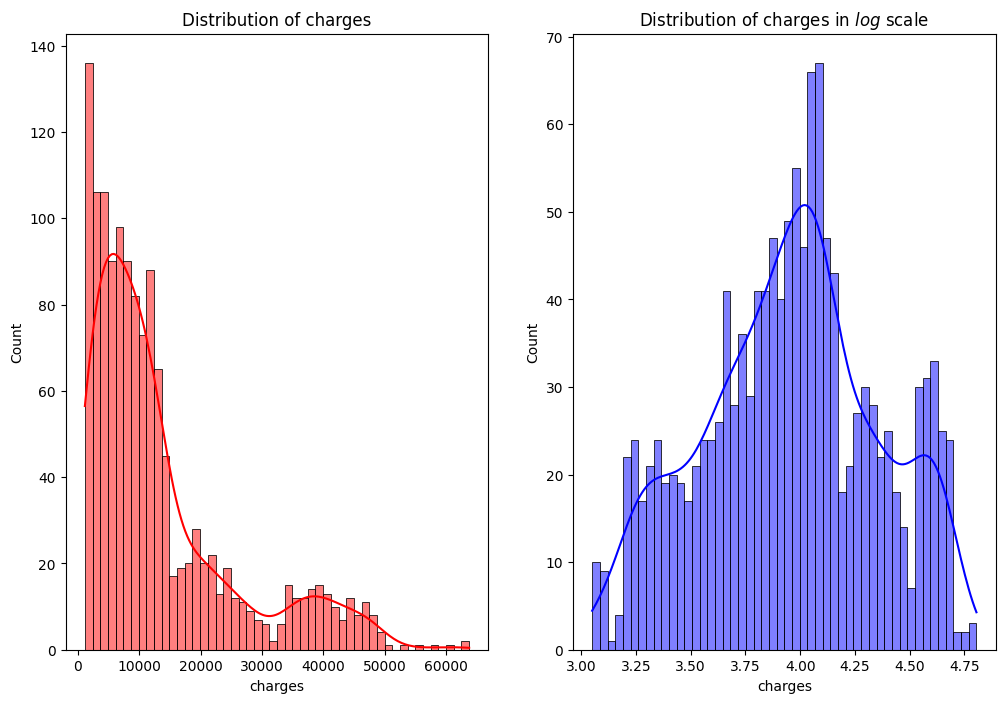

In [43]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(1,2,1)
sns.histplot(df["charges"], color="r", bins=50, ax=ax, kde=True)
ax.set_title("Distribution of charges")

ax = fig.add_subplot(1,2,2)
sns.histplot(np.log10(df["charges"]), bins=50, color="b", ax=ax, kde=True)
ax.set_title("Distribution of charges in $log$ scale")

C:\Users\cs25\AppData\Local\Temp\ipykernel_12108\2239624578.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'For children')

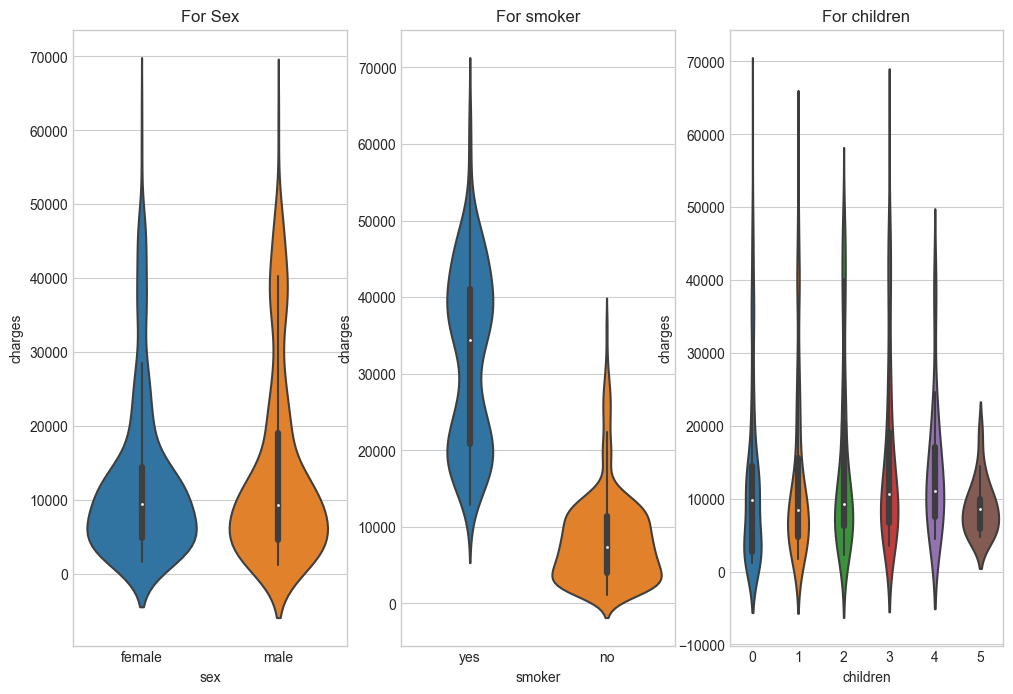

In [54]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1, 3, 1)
sns.violinplot(y=df.charges, x=df.sex, ax=ax)
ax.set_title("For Sex")

ax = fig.add_subplot(1, 3, 2)
sns.violinplot(y=df.charges, x=df.smoker, ax=ax)
ax.set_title("For smoker")

ax = fig.add_subplot(1, 3, 3)
sns.violinplot(y=df.charges, x=df.children, ax=ax)
ax.set_title("For children")

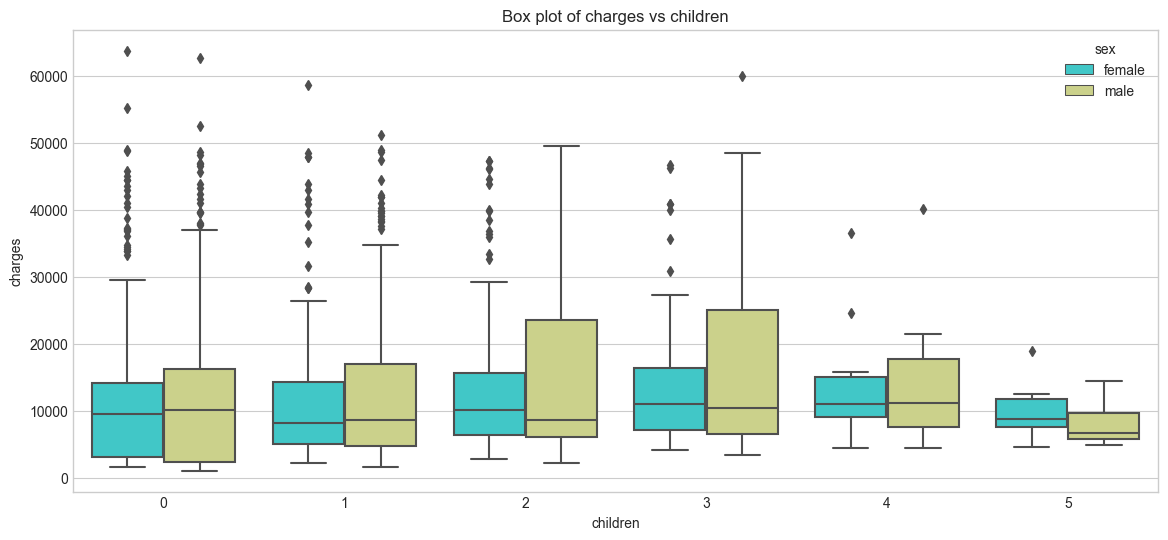

In [55]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [81]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [82]:
df_encode['charges'] = np.log(df_encode['charges'])

In [83]:
categorical_cols = ["children", "sex", "smoker", "region"]
df_encode = pd.get_dummies(data=df, columns=categorical_cols, prefix_sep="_", prefix="OHE", drop_first=True, dtype="int8")
df_encode

,age,bmi,charges,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,0,0,0,0,1,0,0,1,0
2,28,33.000,4449.46200,0,0,1,0,0,1,0,0,1,0
3,33,22.705,21984.47061,0,0,0,0,0,1,0,1,0,0
4,32,28.880,3866.85520,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,0,1,0,0,1,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [84]:
X = df_encode.drop("charges", axis=1)
y = df_encode["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [85]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [86]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [87]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [88]:
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name="Sklearn_theta"))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-11738.954855,-11738.954855
1,theta_1,age,246.272603,246.272603
2,theta_2,bmi,347.988088,347.988088
3,theta_3,OHE_1,321.846883,321.846883
4,theta_4,OHE_2,1476.269020,1476.269020
5,theta_5,OHE_3,1198.109156,1198.109156
6,theta_6,OHE_4,3767.409106,3767.409106
7,theta_7,OHE_5,1964.399228,1964.399228
8,theta_8,OHE_male,-127.955178,-127.955178
9,theta_9,OHE_yes,24252.366362,24252.366362


In [89]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  35152074.799860336
R square obtain for normal equation method is : 0.7305284299807453


In [90]:
y_pred_sk = lin_reg.predict(X_test)

sk_mse = mean_squared_error(y_test, y_pred_sk)
sk_r_squared = lin_reg.score(X_test, y_test)

print('The Mean Square Error(MSE) or J(theta) is: ',sk_mse)
print('R square obtain for sklearn method is :',sk_r_squared)

The Mean Square Error(MSE) or J(theta) is:  35152074.79986036
R square obtain for sklearn method is : 0.7305284299807451


C:\Users\cs25\AppData\Local\Temp\ipykernel_12108\1302784434.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


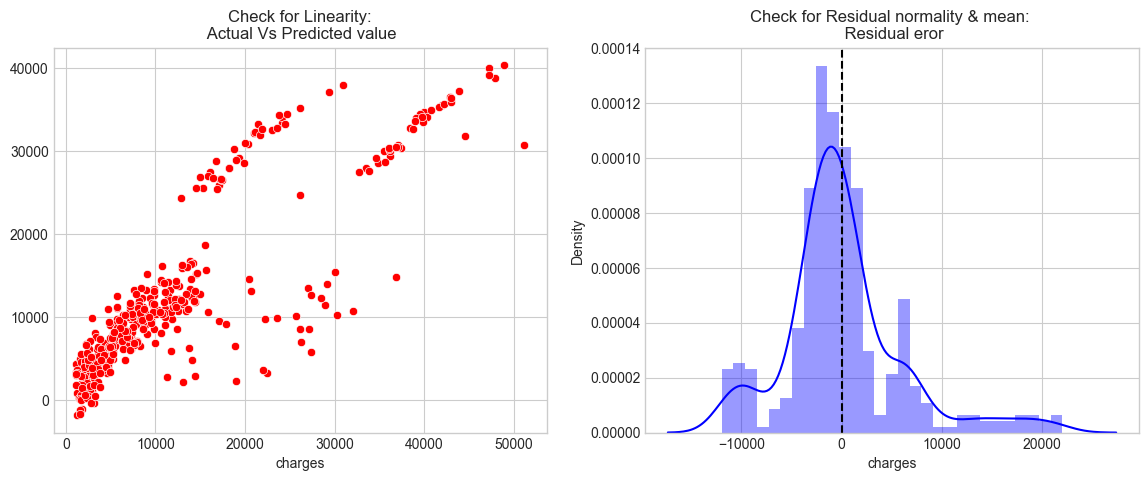

In [96]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [97]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- sk_r_squared)
VIF

3.7109666148772043

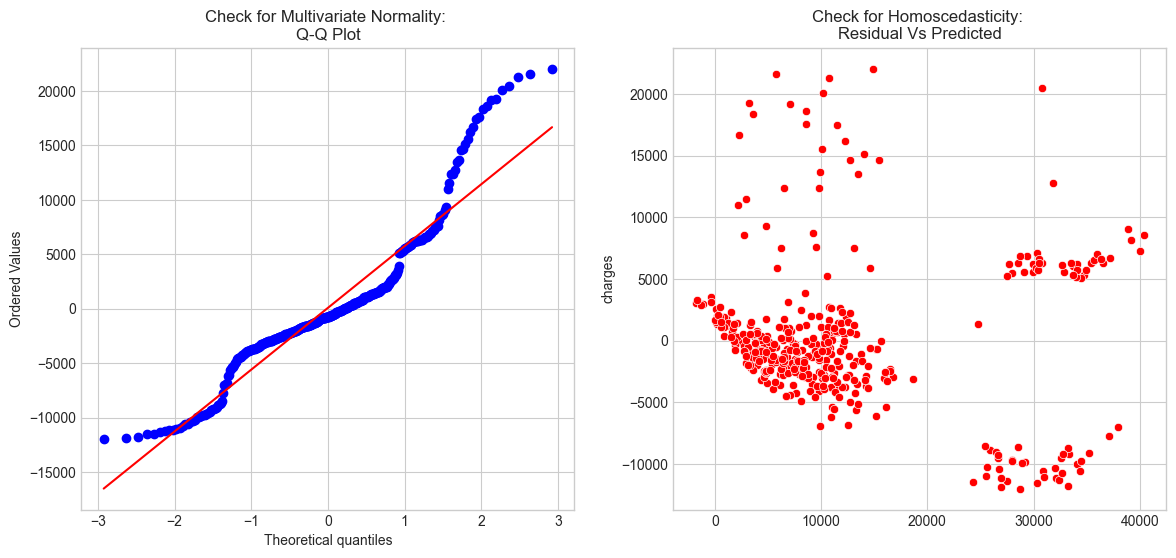

In [98]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');